# Проект 5: Сборный проект #
# "Определяющие успешность игры закономерности" #

### 1. Описание проекта
---
Из открытых источников собран **датасет** до 2016 года с историческими данными:

1. Продажи игр;
2. Оценки пользователей и экспертов;
3. Жанры и платформы.

### 2. Задачи
___

1. Нужно **отработать принцип работы с данными**, который позволяет выявить определяющие успешность игры закономерности.
2. Это нужно для того, чтобы  **определить потенциально популярный продукт и спланировать успешную рекламную кампанию на 2017 год.**

### 3. Выполнение проекта
___

### 3.1. Шаг 1: Изучение общей информации

In [ ]:
#importing lib-s and preferences
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sb
import numpy as np
import matplotlib.ticker as ticker
import scipy as sc
pd.set_option("display.max_columns", None) #for displaying all columns

In [ ]:
#openning file with data from common directory
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Описание датафрейма:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Строки начала датафрейма: и конца датафрейма:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Строки конца датафрейма:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Количество дубликатов:


0

Количество пропусков:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Гистограммы исходного датафрейма:


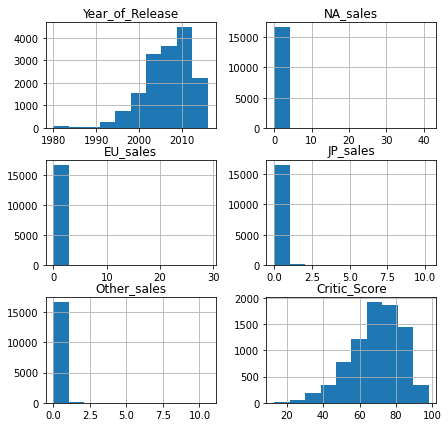

In [ ]:
#function, which shows head, tail, info, description, duplicates, counts Nan's and etc. of DF

def starting_pack(data):
    print('Основная информация о датафрейме:')
    data.info()
    print()
    print('Описание датафрейма:')
    display(data.describe())
    print('Строки начала датафрейма: и конца датафрейма:')
    display(data)
    print('Строки конца датафрейма:')
    display(data.tail())
    print('Количество дубликатов:')
    display(data.duplicated().sum())
    print('Количество пропусков:')
    display(data.isna().sum())
    print('Гистограммы исходного датафрейма:')
    data.hist(figsize=(7, 7));

starting_pack(data)

Из этих данных видно, что таблица имеет 16715 строк, 11 столбцов.
В ячейках находятся типы данных: float64(6), object(5)

Начиная с ~2000 года количество релизов игр резко выросло.


**Название столбцов:**
* `Name` — название игры;
* `Platform` — платформа;
* `Year_of_Release` — год выпуска;
* `Genre` — жанр игры;
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
* `EU_sales` — продажи в Европе (миллионы проданных копий);
* `JP_sales` — продажи в Японии (миллионы проданных копий);
* `Other_sales` — продажи в других странах (миллионы проданных копий);
* `Critic_Score` — оценка критиков (максимум 100);
* `User_Score` — оценка пользователей (максимум 10);
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**В данных присутствуют следующие проблемы:**
 1. столбцы не имеют "стандартную змеиную запись" (строчные вперемешку с заглавными);
 2. столбцы `Year_of_Release`, `User_Score` - неправильный тип данных. Для года нужно использовать `int` или `datetime` (в зависимости от цели исследования), а для рейтингов `float`, но для начала разберемся, почему же в датафрейме именно такой тип данных;
 3. в половине столбцов встречаются пробелы в данных;

### 3.2. Шаг 2: Подготовка данных

Для удобства восприятия, изменим регистр названия столбцов, а также отдельно столбец `Year_of_Release`, на `release`, так как "релиз" - подразумевает под собой год выхода.

In [ ]:
#renaming columns
data = data.rename(columns={
    'Name':'name',
    'Platform':'platform',
    'Year_of_Release':'release',
    'Genre':'genre',
    'NA_sales':'na_sales',
    'EU_sales':'eu_sales',
    'JP_sales':'jp_sales',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'rating'
})

Изменим форматы колонок `release` и `user_score` на приемлемые.

In [ ]:
data['release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: release, dtype: int64

Все строки соответствуют годам. Посмотрим на строки с пропусками.

In [ ]:
data.query('release.isna()')

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропусков 269. Оставим как есть. Абсолютно точно эти строки не заполнишь автоматически (при текущих навыках), только если заняться поиском в интернете. Соответственно ничего не мешает поменять формат на удобочитаемый.

In [ ]:
#changing formats
data['release'] = np.floor(pd.to_numeric(data['release'], errors='coerce')).astype('Int64')

In [ ]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
9.6       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Рейтинг `"tbd"` означает что оценка подлежит уточнению, в связи с тем, что на объект зафиксированно менее 4х обзоров пользователей. Взглянем подробнее на строки со значением `"tbd"`.

In [ ]:
data.query('user_score == "tbd"')

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Исходя из предыдущей строки с пояснением аббривеатуры, можно с уверенностью утверждать, что аббривеатура = Nan.
Поэтому поменяем значения на `Nan`, вместе с форматами ячеек.

In [ ]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').astype('float64')

**Вывод по метрикам оценок:** Заполнять нет смысла, так как это непредсказуемые данные (для одной игры на разных платформах могут быть совершенно разные рейтинги; ремейк может быть хуже оригинала и т.д.)

Проверим, что в колонке `rating` находятся только категориальные данные.

In [ ]:
print(data['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Википедия нам говорит, что рейтинги организации "Entertainment Software Rating Board" (ESRB), означают:
> * «EC» («Early childhood») — «Для детей младшего возраста» (Игра подходит для детей от 3 лет);
> * «E» («Everyone»)/ "K-A" ("Kids to Adults") (до 1998 года) — «Для всех»;
> * «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
> * «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет;
> * «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет;
> * «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет;
> * «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

Но пропуски всё же есть. Заменим их на `WoR`(Without Rating) потому что эти категориальные данные потребуются при дальнейших исследованиях, а рейтинг `К-А` заменим на `Е`.

In [ ]:
data.loc[data['rating'] == 'K-A','rating'] = 'E'
data['rating'] = data['rating'].fillna('WoR')

Проверим пропуски в `name` и `genre`.

In [ ]:
data.query('name.isna()')

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,WoR
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,WoR


Так получилось, что обе игры не имеют названия, жанра, рейтингов, только продажи. Удалим такие строчки, так как данные не пострадают от потери 2х строк.

In [ ]:
data = data.dropna(subset=['name']).reset_index(drop=True)

Посмотрим, каке уникальные есть `name`, `platform` и `genre`.

In [ ]:
print('Уникальные названия игр:',len(data['name'].unique()))
print('Уникальные платформы для игр:',len(data['platform'].unique()))
print('Уникальные жанры игры:',len(data['genre'].unique()))

Уникальные названия игр: 11559
Уникальные платформы для игр: 31
Уникальные жанры игры: 12


Действительно, жанров и платформ приемлемое количество, но проверим, всё ли с ними впорядке.
Названий игр достаточно много, но они занимают не всю длину колонки с именем. Нужно посмотреть подробнее.

Уникальные в `platform`

In [ ]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Всё похоже на правду. Действительно, в мире, все аббривеатуры платформ - встречаются.

Уникальные в `genre`

In [ ]:
data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Всё верно. Такие жанры игр имеют место быть.

Уникальные в `name`

In [ ]:
data['name'].value_counts()

Need for Speed: Most Wanted         12
Madden NFL 07                        9
FIFA 14                              9
Ratatouille                          9
LEGO Marvel Super Heroes             9
                                    ..
Jurassic Park III: Park Builder      1
Galaga: Destination Earth            1
Harvest Moon: Frantic Farming        1
Toki no Kizuna: Sekigahara Kitan     1
Fuzion Frenzy 2                      1
Name: name, Length: 11559, dtype: int64

Теперь становится ясно, что игры с одинаковым названием присутствуют в датафрейме. Взглянем на такие строки на примере `Need for Speed: Most Wanted`

In [ ]:
data.query('name == "Need for Speed: Most Wanted"')

,name,platform,release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,WoR
1189,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1997,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2047,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,WoR
3580,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5971,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6272,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,WoR
6409,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Добавим столбец с суммарными сборами `total_sales`

In [ ]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

**Вывод:**
1. В датафрейме присутствуют одинаковые игры для разных платформ, да ещё и их ремейки. Позже, ВОЗМОЖНО, добавим колонку с отметками, что игра - ремейк (переизданная);
2. Данные о выходе игр могли быть потеряны, ввиду неправильной настройки парсера (или чего-нибудь автоматического), ввиду того, что информация о выходе игр - есть в интернете;
3. Данные метрик об оценках критиков и пользователей могут отсутствовать, как ввиду вышеупомянутой причины, так и из-за нехватки обзоров.

### 3.3. Шаг 3: Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные года.

In [ ]:
games_by_years = data.groupby('release').agg({'release':'count','total_sales':'sum'})
games_by_years.columns = ['count', 'total_sales']
games_by_years = games_by_years.sort_values(by='release', ascending=False).reset_index()
games_by_years

,release,count,total_sales
0,2016,502,129.94
1,2015,606,267.98
2,2014,581,331.53
3,2013,544,361.24
4,2012,653,355.84
5,2011,1136,507.58
6,2010,1255,590.13
7,2009,1426,658.82
8,2008,1427,671.50
9,2007,1197,604.75


Для исследований, которые будут основой построения будующей рекламной кампании, не будем брать игры, вышедшие до 1994 года, так как их суммарное количество ничтожно мало, в сравнении с полным списком.

In [ ]:
games_by_years = games_by_years.query('release > 1993')

Построим графики, отражающие количества продаж по годам.

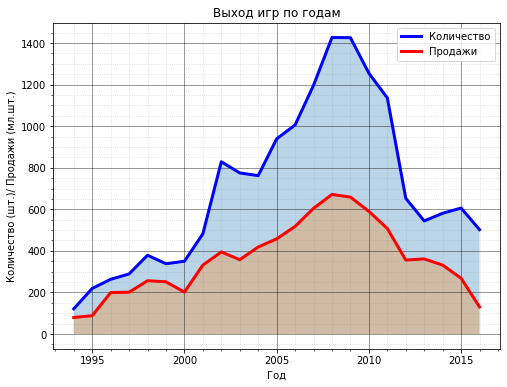

In [ ]:
date = games_by_years['release']
value = games_by_years['count']
sales = games_by_years['total_sales']

#figsize
fig, ax = plt.subplots(figsize=(8, 6))

#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.5)

#grid minor
ax.minorticks_on()
ax.grid(which='minor',
        color = 'gray',
        linestyle = ':',
        alpha=0.3)
#tickers
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(50))

#filling under the line
ax.fill_between(date, 0, value, alpha=0.3)
ax.fill_between(date, 0, sales, alpha=0.3)

#OXY, Title names
ax.set_xlabel('Год')
ax.set_ylabel('Количество (шт.)/ Продажи (мл.шт.)')
ax.set_title('Выход игр по годам')

#plot lines
ax.plot(date, value, color='blue',lw=3, label='Количество')
ax.plot(date, sales, color='red',lw=3, label='Продажи')

#legend
ax.legend();

**По графику видно, что:**
1. После 2000 года наблюдается резкий рост количества игр и их продаж;
2. После 2009 года - резкий спад.

Вероятнее всего, на протяжении лет и с развитием Интернета, разработчики поняли что целесообразнее развивать (дополнять, апдейтить, поддерживать) игры, нежели выпускать новые. Другим объяснением упадка гейм-индустрии на платформах, может служить мобильный гейминг.
___

Посмотрим, **какие платформы были наиболее прибыльными** за всё время.

In [ ]:
platform_by_sales_full = data.groupby('platform').agg({'release':'count','total_sales':'sum'})
platform_by_sales_full.columns = ['count', 'total_sales']
platform_by_sales_full = platform_by_sales_full.sort_values(by='total_sales', ascending=False).reset_index()
platform_by_sales_full

,platform,count,total_sales
0,PS2,2127,1255.77
1,X360,1232,971.42
2,PS3,1306,939.65
3,Wii,1286,907.51
4,DS,2121,806.12
5,PS,1190,730.86
6,GBA,811,317.85
7,PS4,392,314.14
8,PSP,1193,294.05
9,PC,957,259.52


Посмотрим на динамику прожаж игр по топ-10 консолям за разные года.

In [ ]:
top_platforms = platform_by_sales_full['platform'][0:10].unique()
print(top_platforms)

['PS2' 'X360' 'PS3' 'Wii' 'DS' 'PS' 'GBA' 'PS4' 'PSP' 'PC']


In [ ]:
#pivot table of top platforms total sales by year
platforms_top = data.query('platform in @top_platforms').pivot_table(index = 'release',
                                 columns = 'platform',
                                 values = 'total_sales',
                                 aggfunc = 'sum').reset_index()
platforms_top

platform,release,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
0,1985,0.02,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1988,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,NaN,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1994,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN
4,1995,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN
5,1996,NaN,NaN,10.58,94.70,NaN,NaN,NaN,NaN,NaN,NaN
6,1997,NaN,NaN,11.27,136.17,NaN,NaN,NaN,NaN,NaN,NaN
7,1998,NaN,NaN,3.26,169.49,NaN,NaN,NaN,NaN,NaN,NaN
8,1999,NaN,NaN,4.74,144.53,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,NaN,0.07,4.66,96.37,39.17,NaN,NaN,NaN,NaN,NaN


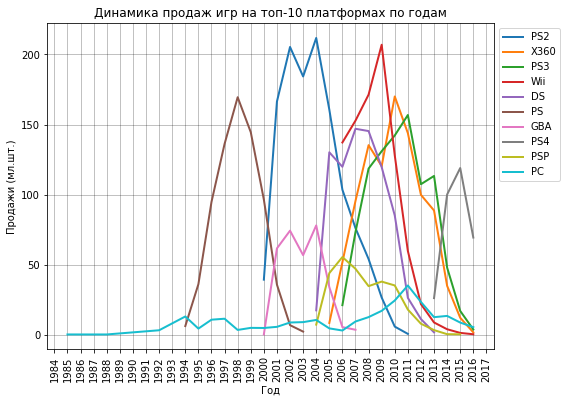

In [ ]:
date = platforms_top['release']
value = platforms_top[top_platforms]

#figsize
fig, ax = plt.subplots(figsize=(8, 6))

#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.3)

#tickers
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

#OXY, Title names
ax.set_xlabel('Год')
ax.set_ylabel('Продажи (мл.шт.)')
ax.set_title('Динамика продаж игр на топ-10 платформах по годам')

#plot lines
ax.plot(date, value,lw=2)

#legend
ax.legend(top_platforms, bbox_to_anchor=(1, 1));

#xticks rotation
plt.xticks(rotation=90);

**Из графика следует, что:**
1. `PS` была популярна в течение 10 лет;
2. `PS2` была популярна в течение 11 лет;
3. `DS` была популярна в течение 10 лет;
4. `GBA` была популярна в течение 8 лет;
5. Смена одного поколения консоли другим - происходит за 3 года;
6. `PC`-гейминг будет жив всегда.

**Рассмотрим динамику продаж** за последние 5 лет, **с 2012 по 2016 год.**

In [ ]:
platform_by_sales_5 = data.query('2011 < release < 2017').groupby('platform').agg({'release':'count','total_sales':'sum'})
platform_by_sales_5.columns = ['count', 'total_sales']
platform_by_sales_5 = platform_by_sales_5.sort_values(by='total_sales', ascending=False).reset_index()
platform_by_sales_5

,platform,count,total_sales
0,PS4,392,314.14
1,PS3,493,288.79
2,X360,292,236.54
3,3DS,396,194.61
4,XOne,247,159.32
5,WiiU,147,82.19
6,PC,250,62.65
7,PSV,411,49.18
8,Wii,54,35.37
9,DS,31,12.55


Получился топ 11. Его и будем рассматривать, так как на старые платформы со временем перестают выпускать игры, в связи с появлением новых поколений или платформ как таковых.

Рассмотрим эти платформы подробнее, по годам.

In [ ]:
top_platforms_last5 = platform_by_sales_5['platform'].unique()
print(top_platforms_last5)

['PS4' 'PS3' 'X360' '3DS' 'XOne' 'WiiU' 'PC' 'PSV' 'Wii' 'DS' 'PSP']


In [ ]:
platforms_by_sales = data.query('2011 < release < 2017')

#pivot table of platform total sales by year
platforms_by_sales = platforms_by_sales.pivot_table(index = 'release',
                                                  columns = 'platform',
                                                  values = 'total_sales',
                                                  aggfunc = 'sum').reset_index()
platforms_by_sales

platform,release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
1,2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2,2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
3,2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
4,2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


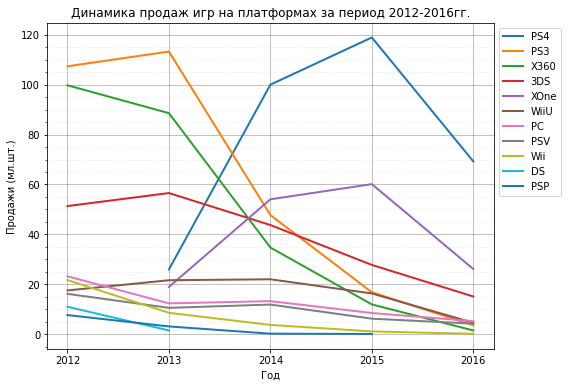

In [ ]:
date = platforms_by_sales['release']
value = platforms_by_sales[top_platforms_last5]

#figsize
fig, ax = plt.subplots(figsize=(8, 6))

#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.3)

#grid minor
ax.minorticks_on()
ax.grid(which='minor',
        color = 'gray',
        linestyle = ':',
        alpha=0.2)
#tickers
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

#OXY, Title names
ax.set_xlabel('Год')
ax.set_ylabel('Продажи (мл.шт.)')
ax.set_title('Динамика продаж игр на платформах за период 2012-2016гг.')

#plot lines
ax.plot(date, value,lw=2)

#legend
ax.legend(top_platforms_last5, bbox_to_anchor=(1, 1));

**По графику видно, что:**
1. Практически все платформы имеют тенденцию к уменьшению продаж;
2. Платформы, на которые точно стоит обращать внимание - `PS4` и `XOne`, так как они появились совсем недавно, и динамика их продаж выглядит оптимистично;
3. Платформа `DS` перестала быть актуальной с 2013 года;
4. Платформа `PSP` перестала быть актуальной с 2015 года;

### Вывод:
1. Среднее время жизни платформы примерно 10 лет;
2. На примере сменяемости поколений консолей `PS-PS2-PS3`, можно отметить, что консоль `PS3` - потеряет популярность к ~2017-2018 году (подтверждается сводной таблицей перед графиком);
3. Чтобы прогнозировать продажи игр, можно обусловится периодом в 5 лет, так как платформы, которые появились в отрезке периода - будут набирать популярность еще в течение 2-3 лет, и оставаться прибыльными, даже если их популярность будет падать;
4. Перспективные платформы: `PS4`,`XOne`, `PC`;
5. Платформы, которые будут актуальные еще некоторое время: `PS3`,`X360`, `WiiU`, `3DS`.
___

**Для дальнейших исследований** отсортируем первоначальный датасет по данным за 2012-2016 годы.


In [ ]:
actual_data = data.query(('release > 2011')) #DATAFRAME OF ACTUAL PERIOD
actual_data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


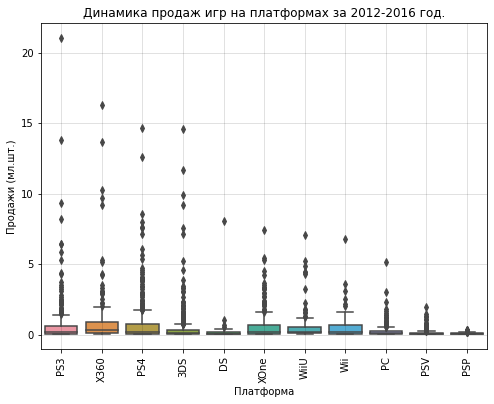

In [ ]:
#figsize
fig, ax = plt.subplots(figsize=(8, 6))

#figure
ax = sb.boxplot(x=actual_data['platform'], y=actual_data['total_sales'])

#limits
#ax.set_ylim(0,3)

#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.15)

#OXY, Title names
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи (мл.шт.)')
ax.set_title('Динамика продаж игр на платформах за 2012-2016 год.');


#xticks rotation
plt.xticks(rotation=90);

Платформы `PS3`,`X360`, `PS4`, `3DS` - "выстрелили" некоторыми играми в своё время.

Посмотрим на график поближе.

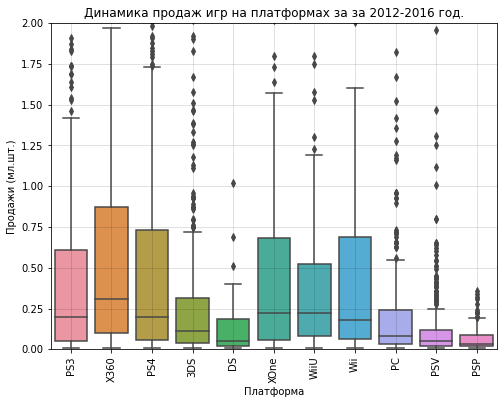

In [ ]:
#figsize
fig, ax = plt.subplots(figsize=(8, 6))

#figure
ax = sb.boxplot(x=actual_data['platform'], y=actual_data['total_sales'])

#limits
ax.set_ylim(0,2)

#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.15)

#OXY, Title names
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи (мл.шт.)')
ax.set_title('Динамика продаж игр на платформах за за 2012-2016 год.');


#xticks rotation
plt.xticks(rotation=90);

1. Самые перспективные платформы - `PS4`,`XOne`,`PS3`,`X360`;
2. Заметно, что для каждой платформы характерны выбросы, которые обозначают самые кассовые игры.
---

**Как влияют отзывы на продажи?**

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. В качестве подопытного выберем `PS4`, так как эта платформа хорошо показала себя в актуальный период.

**`PS4`**

In [ ]:
ps4_scores = actual_data.query('platform == "PS4"').groupby('platform')['critic_score','user_score'].agg(['mean','median']).round(2)
ps4_scores

/tmp/ipykernel_860/3566662997.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ps4_scores = actual_data.query('platform == "PS4"').groupby('platform')['critic_score','user_score'].agg(['mean','median']).round(2)


critic_score        user_score       
                 mean median       mean median
platform                                      
PS4             72.09   73.0       6.75    7.0

Построим диаграмму рассеяния для `critic_score` и `total_sales`, посчитаем корреляцию Пирсона.

Коэффициент корреляции: 0.40656790206178095


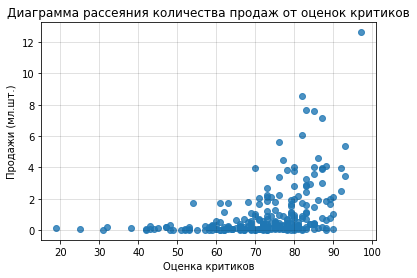

In [ ]:
data_for_ps4 = actual_data.query('platform == "PS4"')

print('Коэффициент корреляции:',data_for_ps4['critic_score'].corr(data_for_ps4['total_sales']))

#figure
ax = sb.regplot(x = data_for_ps4['critic_score'],
                y = data_for_ps4['total_sales'],
                fit_reg=False,
               )
#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.15)

#OXY, Title names
ax.set_xlabel('Оценка критиков')
ax.set_ylabel('Продажи (мл.шт.)')
ax.set_title('Диаграмма рассеяния количества продаж от оценок критиков');

Построим диаграмму рассеяния для `user_score` и `total_sales`, посчитаем корреляцию Пирсона.

Коэффициент корреляции: -0.031957110204556376


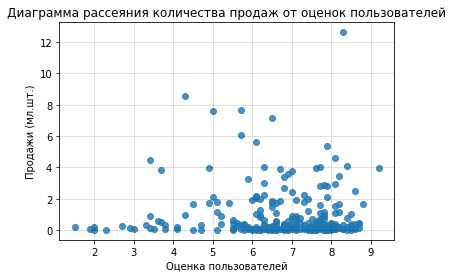

In [ ]:
print('Коэффициент корреляции:',data_for_ps4['user_score'].corr(data_for_ps4['total_sales']))

#figure
ax = sb.regplot(x = data_for_ps4['user_score'],
                y = data_for_ps4['total_sales'],
                fit_reg=False,
               )
#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.15)

#OXY, Title names
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Продажи (мл.шт.)')
ax.set_title('Диаграмма рассеяния количества продаж от оценок пользователей');

**Выводы:**

1. Коэф. показывает слабую зависимость, однако она присутствует для случая с критиками, и отсутствует для оценок пользователей;
2. По графику не прослеживается явной зависимости.

**`ОСТАЛЬНЫЕ АКТУАЛЬНЫЕ ПЛАТФОРМЫ`**

Платформа PS4
Коэффициент корреляции: critic_score и total_sales 0.40656790206178095


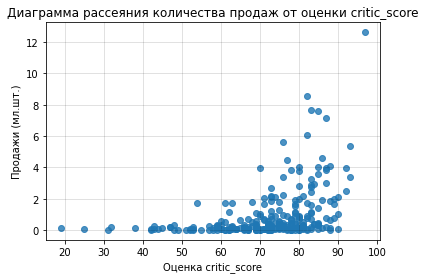

Коэффициент корреляции: user_score и total_sales -0.031957110204556376


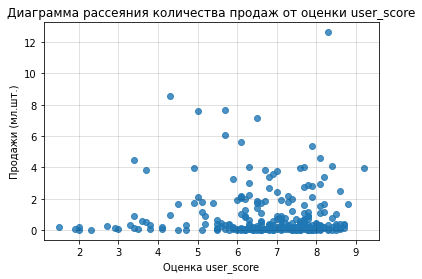

Платформа XOne
Коэффициент корреляции: critic_score и total_sales 0.4169983280084017


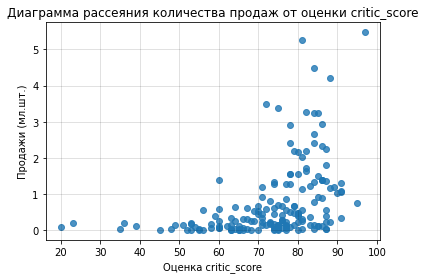

Коэффициент корреляции: user_score и total_sales -0.06892505328279414


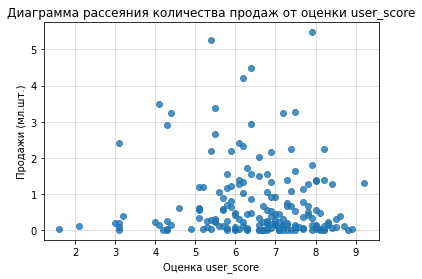

Платформа PC
Коэффициент корреляции: critic_score и total_sales 0.23724324311567915


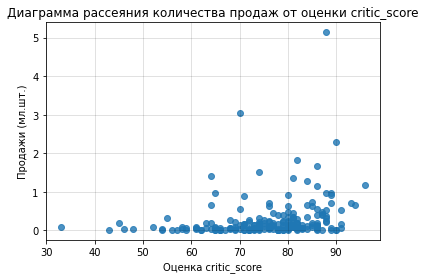

Коэффициент корреляции: user_score и total_sales -0.12186747630735577


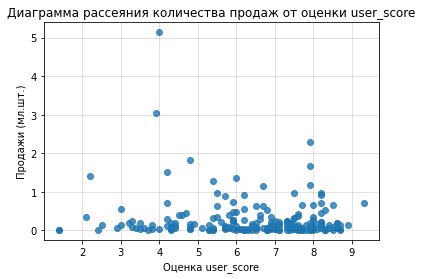

Платформа PS3
Коэффициент корреляции: critic_score и total_sales 0.3314972592629587


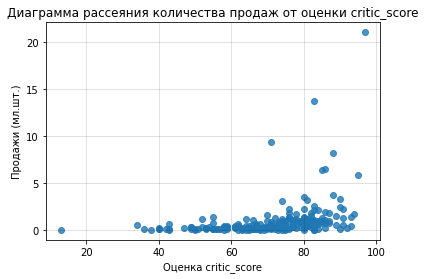

Коэффициент корреляции: user_score и total_sales -0.005143522887113828


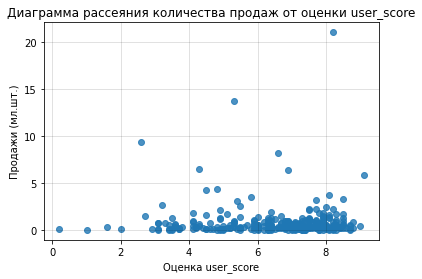

Платформа X360
Коэффициент корреляции: critic_score и total_sales 0.3605734888507336


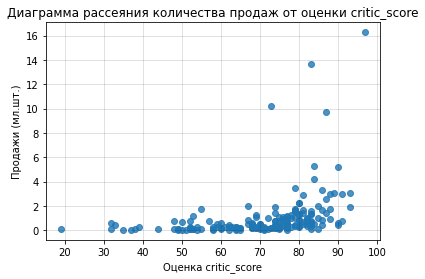

Коэффициент корреляции: user_score и total_sales 0.006163978646213326


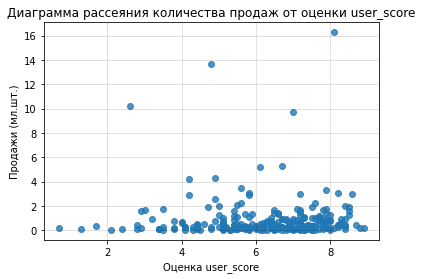

Платформа WiiU
Коэффициент корреляции: critic_score и total_sales 0.34837976012017485


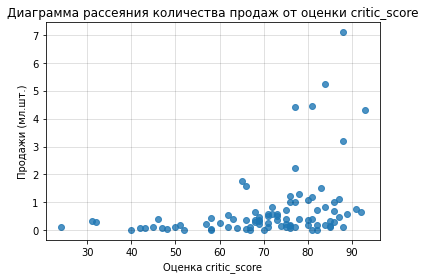

Коэффициент корреляции: user_score и total_sales 0.4002190202148617


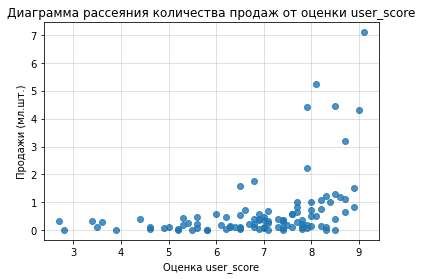

Платформа 3DS
Коэффициент корреляции: critic_score и total_sales 0.3208028695360785


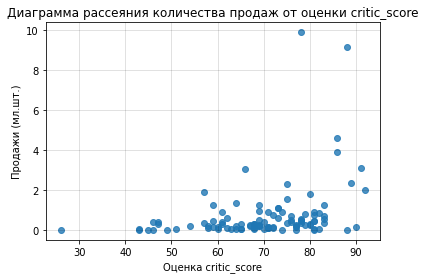

Коэффициент корреляции: user_score и total_sales 0.19758263411038599


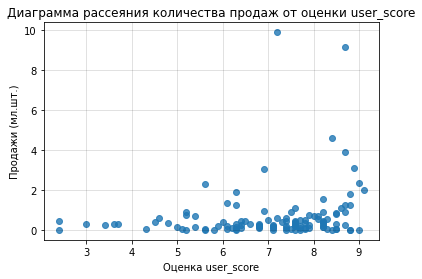

In [ ]:
# actual_platforms - list of actual platforms
actual_platforms = ['PS4','XOne', 'PC','PS3','X360', 'WiiU', '3DS']
# actual_data - dataframe of actual platforms and years
score_types = ['critic_score', 'user_score']

for platform in actual_platforms:
    print('Платформа', platform)
    for score in score_types:
        print('Коэффициент корреляции:', score, 'и total_sales',
              actual_data.query('platform == @platform')[score]\
              .corr(actual_data.query('platform == @platform')['total_sales']))

        #figure
        ax = sb.regplot(x = actual_data.query('platform == @platform')[score],
                y = actual_data.query('platform == @platform')['total_sales'],
                fit_reg=False,
               )

        #grid major
        ax.grid(which='major',
               color = 'black', alpha=0.15)

        #OXY, Title names
        ax.set_xlabel(f'Оценка {score}')
        ax.set_ylabel('Продажи (мл.шт.)')
        ax.set_title(f'Диаграмма рассеяния количества продаж от оценки {score}')


        plt.show()

**Выводы:**

1. Связь отзывов критиков и пользователей с суммой продаж для всех платформ - аналогична платформе `PS4`;
2. Для платформы `WiiU` отзывы пользователей коррелируют с количеством продаж сильнее, чем отзывы критиков (всё таки Япония - другой мир).
---

Посмотрим на распределения игр по **жанрам** и как они относятся к **продажам**.



In [ ]:
genre_data = data.groupby('genre').agg({'total_sales':['count','sum','median']})
genre_data.columns = ['count', 'sum','median']
genre_data = genre_data.sort_values(by='count', ascending=False).reset_index()
display(genre_data)
display(genre_data.sort_values(by='sum', ascending=False))
display(genre_data.sort_values(by='median', ascending=False))

,genre,count,sum,median
0,Action,3369,1744.17,0.19
1,Sports,2348,1331.27,0.22
2,Misc,1750,802.51,0.16
3,Role-Playing,1498,934.56,0.18
4,Shooter,1323,1052.45,0.24
5,Adventure,1303,237.59,0.05
6,Racing,1249,728.67,0.19
7,Platform,888,827.77,0.27
8,Simulation,873,389.97,0.15
9,Fighting,849,447.53,0.21


,genre,count,sum,median
0,Action,3369,1744.17,0.19
1,Sports,2348,1331.27,0.22
4,Shooter,1323,1052.45,0.24
3,Role-Playing,1498,934.56,0.18
7,Platform,888,827.77,0.27
2,Misc,1750,802.51,0.16
6,Racing,1249,728.67,0.19
9,Fighting,849,447.53,0.21
8,Simulation,873,389.97,0.15
11,Puzzle,580,242.57,0.11


,genre,count,sum,median
7,Platform,888,827.77,0.27
4,Shooter,1323,1052.45,0.24
1,Sports,2348,1331.27,0.22
9,Fighting,849,447.53,0.21
0,Action,3369,1744.17,0.19
6,Racing,1249,728.67,0.19
3,Role-Playing,1498,934.56,0.18
2,Misc,1750,802.51,0.16
8,Simulation,873,389.97,0.15
11,Puzzle,580,242.57,0.11


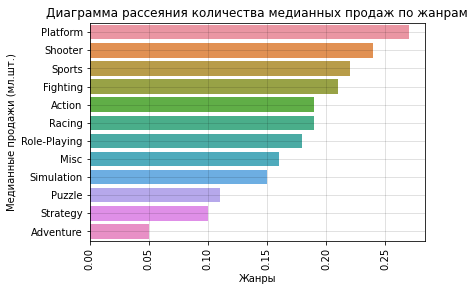

In [ ]:
genre_data = genre_data.sort_values(by='median', ascending=False).reset_index()

#figure
ax = sb.barplot(x=genre_data['median'], y=genre_data['genre'])

#OXY, Title names
ax.set_xlabel('Жанры')
ax.set_ylabel('Медианные продажи (мл.шт.)')
ax.set_title('Диаграмма рассеяния количества медианных продаж по жанрам');

#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.15)

#xticks rotation
plt.xticks(rotation=90);

Очевидно, что по продажам и суммарной выручке лидирует жанр `Action`. Оказался достойным внимания жанр `Shooter`: по количествам игр немного уступает второй строчке, однако более прибылен, нежели `Role-Playing`. Точно не стоит присматриваться к жанру `Adventure`, так как в этой категории продажи показывают себя не лучшим образом. А вот по медианным продажам лидирует жанр `Platform` (Можно интерпретировать такой жанр как "показывающий себя стабильно").

Посмотрим на диаграмы размахов продаж игр по жанрам за весь период.

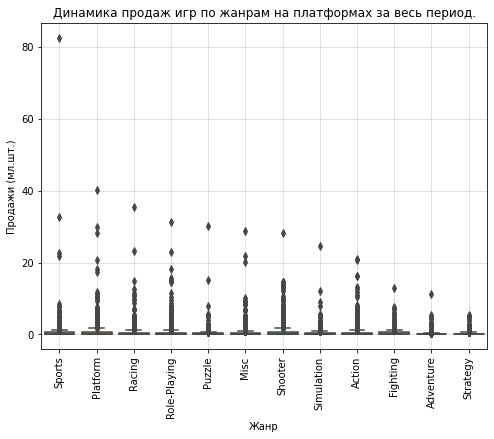

In [ ]:
#figsize
fig, ax = plt.subplots(figsize=(8, 6))

#figure
ax = sb.boxplot(x=data['genre'], y=data['total_sales'])

#limits
#ax.set_ylim(0,3)

#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.15)

#OXY, Title names
ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи (мл.шт.)')
ax.set_title('Динамика продаж игр по жанрам на платформах за весь период.');

#xticks rotation
plt.xticks(rotation=90);

Из диаграммы размаха видно, что у некоторых жанров присутствуют сильные выбросы. Посмотрим на такую диаграмму ближе, с целью понять в каком жанре присутствует устойчивый спрос.

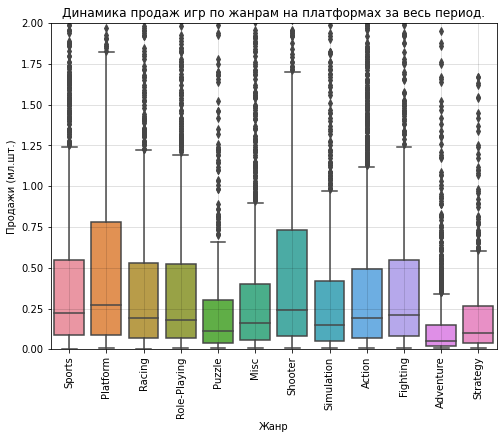

In [ ]:
#figsize
fig, ax = plt.subplots(figsize=(8, 6))

#figure
ax = sb.boxplot(x=data['genre'], y=data['total_sales'])

#limits
ax.set_ylim(0,2)

#grid major
ax.grid(which='major',
       color = 'black',
       alpha=0.15)

#OXY, Title names
ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи (мл.шт.)')
ax.set_title('Динамика продаж игр по жанрам на платформах за весь период.');

#xticks rotation
plt.xticks(rotation=90);

**Вывод:**
1. По продажам и суммарной выручке лидирует жанр `Action`;
2. `Shooter`: по количествам игр немного уступает второй строчке, однако более прибылен, нежели `Role-Playing`;
3. Точно не стоит присматриваться к жанру `Adventure`, так как в этой категории продажи показывают себя не лучшим образом.
4. По медианным продажам лидирует жанр `Platform` (Можно интерпретировать такой жанр как "показывающий себя стабильно");
5. Наиболее стабильным жанром из всех - показал себя `Sports`.

Итак, топ жанров, показывающих себя лучшим образом:
1. `Action`
2. `Sports`
3. `Shooter`
---

### 3.4. Шаг 4: Портреты пользователей региона.

Популярные **платформы по регионам.**

In [ ]:
region_data = actual_data.groupby('platform')[['na_sales','eu_sales','jp_sales']].agg('sum').reset_index()
display(region_data)

,platform,na_sales,eu_sales,jp_sales
0,3DS,55.31,42.64,87.79
1,DS,4.59,3.53,3.72
2,PC,19.12,37.76,0.00
3,PS3,103.38,106.86,35.29
4,PS4,108.74,141.09,15.96
5,PSP,0.13,0.42,10.47
6,PSV,10.98,11.36,21.04
7,Wii,17.45,11.92,3.39
8,WiiU,38.10,25.13,13.01
9,X360,140.05,74.52,1.57


Распределение продаж по платформам в NA:


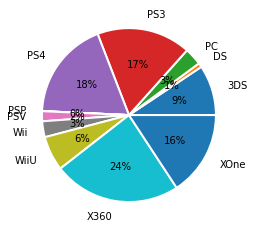

Распределение продаж по платформам в EU:


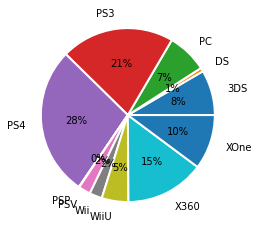

Распределение продаж по платформам в JP:


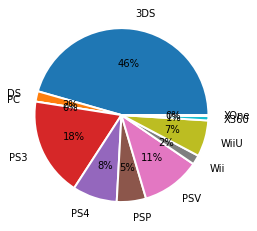

In [ ]:
region_sales = ['na_sales','eu_sales','jp_sales']
for region in region_sales:

    #Pieplot
    plt.pie(region_data[region], #column
            labels=region_data['platform'], #index (x)
            labeldistance=1.18, #wedgenames dist from pie
            wedgeprops = {'linewidth':2,'edgecolor':'white'}, #wedgeborders
            autopct='%1.0f%%'); #percentage

    print(f'Распределение продаж по платформам в {region[0:2].upper()}:')
    plt.show();

**Ввывод:**

1. В регионе Северной Америки первые позиции держат платформы XBox;
2. В Европе 51% платформ PlayStation;
3. В Японии отсутствует PC гейминг как таковой, и лидерство за Nintendo. Примечательно, что платформы XBox практически непопулярны.

Популярность платформ распределена достаточно характерно, ввиду того, что платформы принадлежат компаниям, берущим начало из аналогичных регионов. Исключение для PlayStation в Европе. Вероятнее всего деятельность компании Sony была направлена на Европейский регион.

---

Популярные **жанры по регионам.**

In [ ]:
region_genre = actual_data.groupby('genre')[['na_sales','eu_sales','jp_sales']].agg('sum').reset_index()
display(region_genre)

,genre,na_sales,eu_sales,jp_sales
0,Action,177.84,159.34,52.80
1,Adventure,8.92,9.46,8.24
2,Fighting,19.79,10.79,9.44
3,Misc,38.19,26.32,12.86
4,Platform,25.38,21.41,8.63
5,Puzzle,1.13,1.40,2.14
6,Racing,17.22,27.29,2.50
7,Role-Playing,64.00,48.53,65.44
8,Shooter,144.77,113.47,9.23
9,Simulation,7.97,14.55,10.41


Распределение популярных жанров по платформам в NA:


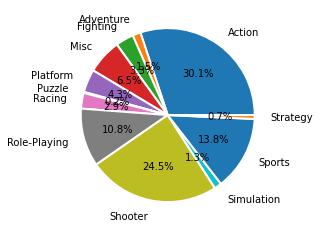

Распределение популярных жанров по платформам в EU:


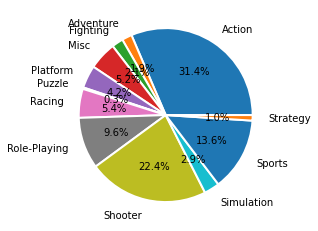

Распределение популярных жанров по платформам в JP:


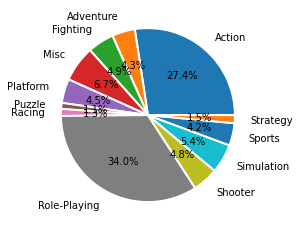

In [ ]:
for region in region_sales:

    #Pieplot
    plt.pie(region_genre[region], #column
            labels=region_genre['genre'], #index (x)
            labeldistance=1.18, #wedgenames dist from pie
            wedgeprops = {'linewidth':2,'edgecolor':'white'}, #wedgeborders
            autopct='%1.1f%%'); #percentage

    print(f'Распределение популярных жанров по платформам в {region[0:2].upper()}:')
    plt.show();

**Вывод:**

1. Самые популярные жанры в регионах `NA` и `EU`: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Misc`;
2. В регионе `JP`: `Role-Playing`, `Action`, `Simulation`, `Shoter`, `Misc`.

Предсказание верно: Япония - другой мир.

---

Рейтинги **ESRB по регионам**, и влияние их на продажи

In [ ]:
ratings_region = actual_data.groupby('rating')[['na_sales','eu_sales','jp_sales']].agg('sum').reset_index()
display(ratings_region)

,rating,na_sales,eu_sales,jp_sales
0,E,114.37,113.03,28.33
1,E10+,75.70,55.37,8.19
2,M,231.57,193.96,21.20
3,T,66.02,52.96,26.02
4,WoR,103.31,91.50,108.84


Распределение рейтингов игр в NA:


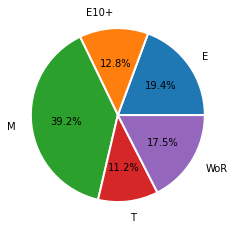

Распределение рейтингов игр в EU:


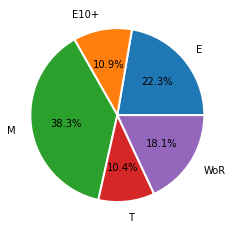

Распределение рейтингов игр в JP:


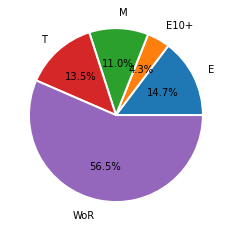

In [ ]:
for region in region_sales:

    #Pieplot
    plt.pie(ratings_region[region], #column
            labels=ratings_region['rating'], #index (x)
            labeldistance=1.18, #wedgenames dist from pie
            wedgeprops = {'linewidth':2,'edgecolor':'white'}, #wedgeborders
            autopct='%1.1f%%'); #percentage

    print(f'Распределение рейтингов игр в {region[0:2].upper()}:')
    plt.show();

Сумма и количество игр по рейтингам ESRB в NA:


na_sales      
            sum count
rating               
E        114.37   395
E10+      75.70   306
M        231.57   498
T         66.02   412
WoR      103.31  1275

Таблица корреляции рейтингов ESRB и продаж в NA:


na_sales         
                    sum    count
na_sales sum    1.00000  0.01403
         count  0.01403  1.00000

Сумма и количество игр по рейтингам ESRB в EU:


eu_sales      
            sum count
rating               
E        113.03   395
E10+      55.37   306
M        193.96   498
T         52.96   412
WoR       91.50  1275

Таблица корреляции рейтингов ESRB и продаж в EU:


eu_sales         
                    sum    count
eu_sales sum    1.00000  0.04525
         count  0.04525  1.00000

Сумма и количество игр по рейтингам ESRB в JP:


jp_sales      
            sum count
rating               
E         28.33   395
E10+       8.19   306
M         21.20   498
T         26.02   412
WoR      108.84  1275

Таблица корреляции рейтингов ESRB и продаж в JP:


jp_sales          
                     sum     count
jp_sales sum    1.000000  0.985927
         count  0.985927  1.000000

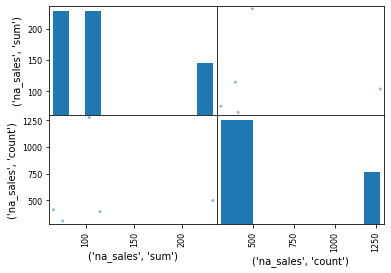

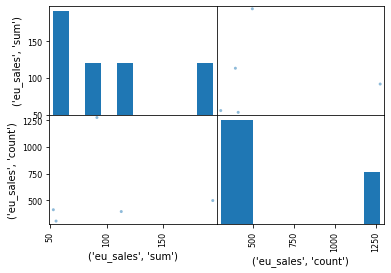

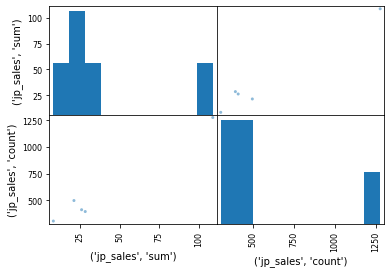

In [ ]:
for region in region_sales:
    temp_table = actual_data.groupby('rating').agg({region:['sum','count']})
    print(f'Сумма и количество игр по рейтингам ESRB в {region[0:2].upper()}:')
    display(temp_table)
    print(f'Таблица корреляции рейтингов ESRB и продаж в {region[0:2].upper()}:')
    display(temp_table.corr())
    pd.plotting.scatter_matrix(temp_table)

**Вывод:**

1. Распределение рейтингов ESRB в Северной Америке и Европе имеет одинаковую картину. Лидирует рейтинг `M`(для лиц, старше 17 лет);
2. Япония - другой мир, потому там картина выглядит гораздо иначе. Большинство игр без рейтинга. Причинами этого могут быть другие правила присвоения рейтингов и, в целом, предпочтения конечных пользователей;
3. Рейтинги ESRB не влияют на продажи игр в регионах Северной Америки и Европы, а в Японии дела обстоят наоборот. Прослеживается сильная зависимость рейтинга игры и ее продажами (чем больше возрастная категория игры - тем больше ее продаж);
4. Наверняка, ввиду того, что шутеры и экшн-игры наиболее популярны во всем мире, то можно сделать вывод, что категориальные рейтинги ESRB будут преволировать в выборках.

---

### 3.5. Шаг 5: Проверка гипотез.

**"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"**

Проверим это высказывание методом проверки гипотезы о равенстве среднего двух совокупностей и рассчитаем дисперсии, используя ttest_ind, так как мы не знаем равны ли выборки и какие у них дисперсии.

Сначала подготовим выборки и уберем из них пропуски, так как метод не работает с ними.

***Выборки за период 2012 - 2016***

Гипотеза языком статистики:
 * H0: Средний пользовательский рейтинг платформ Xbox One и PC **одинаковый**;
 * H1: Средний пользовательский рейтинг платформ Xbox One и PC **разный**. (Поскольку альтернативная в задании не формировалась, то она будет звучать как "не H0", то есть "не одинаковый" == "разный").

In [ ]:
xone_user_score = actual_data.query('platform == "XOne" ')
xone_user_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16670
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          247 non-null    object 
 1   platform      247 non-null    object 
 2   release       247 non-null    Int64  
 3   genre         247 non-null    object 
 4   na_sales      247 non-null    float64
 5   eu_sales      247 non-null    float64
 6   jp_sales      247 non-null    float64
 7   other_sales   247 non-null    float64
 8   critic_score  169 non-null    float64
 9   user_score    182 non-null    float64
 10  rating        247 non-null    object 
 11  total_sales   247 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 25.3+ KB


182 оценки. Такого количества должно хватить.

In [ ]:
xone_user_score = xone_user_score.dropna(subset = ['user_score'])

In [ ]:
pc_user_score = actual_data.query('platform == "PC" ')
pc_user_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 192 to 16690
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          250 non-null    object 
 1   platform      250 non-null    object 
 2   release       250 non-null    Int64  
 3   genre         250 non-null    object 
 4   na_sales      250 non-null    float64
 5   eu_sales      250 non-null    float64
 6   jp_sales      250 non-null    float64
 7   other_sales   250 non-null    float64
 8   critic_score  198 non-null    float64
 9   user_score    206 non-null    float64
 10  rating        250 non-null    object 
 11  total_sales   250 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 25.6+ KB


206 значений. Этого хватит.

In [ ]:
pc_user_score = pc_user_score.dropna(subset = ['user_score'])

Зададим значение значимоси (критерий Стьюдента) в 5%, руководствуясь общепринятыми мерками.

In [ ]:
alpha = 0.05

Проверим гипотезу H0: **Средний пользовательский рейтинг платформ Xbox One и PC одинаковый.**

In [ ]:
#checking 2-side hyp.
results = sc.stats.ttest_ind(xone_user_score['user_score'], pc_user_score['user_score'], equal_var=False)
print('P-value:',results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Интересно получается...

Проверимэту гипотезу "руками".



In [ ]:
hyp1_data = actual_data.query('platform in ["XOne","PC"]').pivot_table(index = 'platform',
                                                                values = 'user_score',
                                                                aggfunc = 'mean').reset_index()
display(hyp1_data)

,platform,user_score
0,PC,6.428641
1,XOne,6.521429


In [ ]:
print('На сколько % различаются средние значения:', (1 - hyp1_data['user_score'][0]/hyp1_data['user_score'][1])*100)

На сколько % различаются средние значения: 1.4228139388977046


**Выводы:**

1. Средний пользовательский рейтинг платформ Xbox One и PC действительно одинаковый (различия статистически не значимые);
2. Если поменять критерий Стьюдента на 1% - то гипотеза об одинаковости среднего рейтинга будет опровергнута.

---

**"Средние пользовательские рейтинги жанров Action и Sports разные"**

Гипотеза языком статистики:
 * H0: Средний пользовательский рейтинг жанров Action и Sports **одинаковый**;
 * H1: Средний пользовательский рейтинг жанров Action и Sports **разный**. (Статистическое различие будет больше критерия ошибки, тем самым вероятность попасть в область, близкую к одному из средних значений > вероятности ошибки).

In [ ]:
action_user_score = actual_data.query('genre == "Action" ')
action_user_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 16 to 16708
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1031 non-null   object 
 1   platform      1031 non-null   object 
 2   release       1031 non-null   Int64  
 3   genre         1031 non-null   object 
 4   na_sales      1031 non-null   float64
 5   eu_sales      1031 non-null   float64
 6   jp_sales      1031 non-null   float64
 7   other_sales   1031 non-null   float64
 8   critic_score  436 non-null    float64
 9   user_score    523 non-null    float64
 10  rating        1031 non-null   object 
 11  total_sales   1031 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 105.7+ KB


In [ ]:
sports_user_score = actual_data.query('genre == "Sports" ')
sports_user_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 77 to 16641
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          268 non-null    object 
 1   platform      268 non-null    object 
 2   release       268 non-null    Int64  
 3   genre         268 non-null    object 
 4   na_sales      268 non-null    float64
 5   eu_sales      268 non-null    float64
 6   jp_sales      268 non-null    float64
 7   other_sales   268 non-null    float64
 8   critic_score  143 non-null    float64
 9   user_score    195 non-null    float64
 10  rating        268 non-null    object 
 11  total_sales   268 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 27.5+ KB


Уберем пропуски

In [ ]:
action_user_score = action_user_score.dropna(subset = ['user_score'])
sports_user_score = sports_user_score.dropna(subset = ['user_score'])

Значений достаточно. Проверим нулевую гипотезу.

In [ ]:
#checking 2-side hyp.
results = sc.stats.ttest_ind(action_user_score['user_score'], sports_user_score['user_score'], equal_var=False)
print('P-value:',results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Проверим "руками" для большей уверенности.

In [ ]:
hyp2_data = actual_data.query('genre in ["Sports","Action"]').pivot_table(index = 'genre',
                                                                values = 'user_score',
                                                                aggfunc = 'mean').reset_index()
display(hyp2_data)
print('На сколько % различаются средние значения:', (1 - hyp2_data['user_score'][1]/hyp2_data['user_score'][0])*100)

,genre,user_score
0,Action,6.825048
1,Sports,5.455897


На сколько % различаются средние значения: 20.060670710901938


Да, различие больше критерия Стьюдента, значит H0 - отвергаем (статистическое различие > критерия ошибки), и принимаем H1.

**Вывод:**

Средний пользовательский рейтинг жанров Action и Sports разный.

---

### 3.6. Шаг 6: Общий вывод.

Была получена выборка до 2016 года с историческими данными о продажах игр, об оценках пользователей и экспертов, о жанрах и платформах. Выборка включает в себя 16715 строк.

**В выборке присутствовали пробелы:**

 1. Столбцы не имели "стандартную змеиную запись" (строчные вперемешку с заглавными);
 2. Столбцы `Year_of_Release`, `User_Score` - неправильный тип данных. Для года нужно использовали `int`, а для рейтингов `float`;
 3. В половине столбцов встречались пробелы в данных.

**Выборка претерпела изменения:**

 1. Для удобства восприятия, изменили регистр названия столбцов, а также отдельно столбец `Year_of_Release`, на `release`, так как "релиз" - подразумевает под собой год выхода;
 2. Изменили форматы колонок `release` и `user_score` на приемлемые;
 3. Рейтинг `"tbd"` означает что оценка подлежит уточнению, в связи с тем, что на объект зафиксированно менее 4х обзоров пользователей. Аббривеатура = Nan. Поэтому поменяли значения на `Nan`, вместе с форматами ячеек;
 4. Заменены пропуски на `WoR`(Without Rating) потому что эти категориальные данные потребуются при дальнейших исследованиях, а рейтинг `К-А` заменли на `Е`;
 5. Было удалено 2 строки, в которых были пропуски названий игры и их жанра;
 6. В датафрейме присутствуют одинаковые игры для разных платформ, да ещё и их ремейки;
 7. Данные о выходе игр могли быть потеряны, ввиду неправильной настройки парсера (или чего-нибудь автоматического), ввиду того, что информация о выходе игр - есть в интернете;
 8. Данные метрик об оценках критиков и пользователей могут отсутствовать, как ввиду вышеупомянутой причины, так и из-за нехватки обзоров.

**В результате исследовательского анализа данных, было установлено, что:**

 1. После 2000 года наблюдается резкий рост количества игр и их продаж;
 2. После 2009 года - резкий спад;

Вероятнее всего, на протяжении лет и с развитием Интернета, разработчики поняли что целесообразнее развивать (дополнять, апдейтить, поддерживать) игры, нежели выпускать новые. Другим объяснением упадка гейм-индустрии на платформах, может служить мобильный гейминг.

 3. Среднее время жизни платформы примерно 10 лет;
 4. На примере сменяемости поколений консолей `PS-PS2-PS3`, можно отметить, что консоль `PS3` - потеряет популярность к ~2017-2018 году;
 5. Чтобы прогнозировать продажи игр, можно обусловится периодом в 5 лет, так как платформы, которые появились в отрезке периода - будут набирать популярность еще в течение 2-3 лет, и оставаться прибыльными, даже если их популярность будет падать.


**Был выбран актуальный период (с 2012 по 2016 год):**

 1. Самые перспективные платформы - `PS4`,`XOne` - к ним точно стоит присмотреться;
 2. Перспективные платформы: `PC`,`PS3`,`X360`;
 3. Платформы, которые будут актуальные еще некоторое время: `PS3`,`X360`, `WiiU`, `3DS`;
 4. Связь отзывов критиков и пользователей с суммой продаж для всех платформ - отсутствует;
 5. Для платформы `WiiU` отзывы пользователей коррелируют с количеством продаж сильнее, чем отзывы критиков (всё таки Япония - другой мир).
 6. По продажам и суммарной выручке лидирует жанр `Action`. Оказался достойным внимания жанр `Shooter`: по количествам игр немного уступает второй строчке, однако более прибылен, нежели `Role-Playing`. Точно не стоит присматриваться к жанру `Adventure`, так как в этой категории продажи показывают себя не лучшим образом. Тем  самым топ-5 по прибыльности жанров: `Action`, `Shooter`, `Sports`.
 7. В регионе Северной Америки первые позиции держат платформы XBox;
 8. В Европе 51% платформ PlayStation;
 9. В Японии отсутствует PC гейминг как таковой, и лидерство за Nintendo. Примечательно, что платформы XBox практически непопулярны;
 10. Самые популярные жанры в регионах `NA` и `EU`: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Misc`;
 11. В регионе `JP`: `Role-Playing`, `Action`, `Simulation`, `Shoter`, `Misc`;

Популярность платформ распределена достаточно характерно, ввиду того, что платформы принадлежат компаниям, берущим начало из аналогичных регионов. Исключение для PlayStation в Европе. Вероятнее всего деятельность компании Sony была направлена на Европейский регион.

 12. Распределение рейтингов ESRB в Северной Америке и Европе имеет одинаковую картину. Лидирует рейтинг `M`(для лиц, старше 17 лет);
 13. Япония - другой мир, потому там картина выглядит гораздо иначе. Большинство игр без рейтинга. Причинами этого могут быть другие правила присвоения рейтингов и, в целом, предпочтения конечных пользователей;
 14. Рейтинги ESRB не влияют на продажи игр в регионах Северной Америки и Европы, а в Японии дела обстоят наоборот. Прослеживается сильная зависимость рейтинга игры и ее продажами (чем больше возрастная категория игры - тем больше ее продаж).

**Были проверены гипотезы:**

1. "Средний пользовательский рейтинг платформ Xbox One и PC одинаковый" - подтверждена;
2. "Средние пользовательские рейтинги жанров Action и Sports разные" - подтверждена.
___